Построение SVM и выбор оптимального ядра.
Цель: Цель данного ДЗ - "потрогать" алгоритм SVM на практике. Возьмите один из двух датасетов (или выберете свой) и попробуйте получить на нем максимальные метрики качества, используя алгоритм SVM. Проведите сравнение с Логистической регрессией. Используйте техники Feature Preprocessing, изученные ранее. 
Два датасета: 
1) https://archive.ics.uci.edu/ml/datasets/IDA2016Challenge 
2) https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/overview 
С обоими датасетами вы уже знакомы - один был в ДЗб другой на лекции про Feature Preprocessing.


1) Возьмите датасет, выполните предобработку


## EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('./data/train.csv')

In [3]:
data.shape

(114321, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
data.drop(['ID'], axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 132 entries, target to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 115.1+ MB


##### NB: 19  категориальных данных, 113 числовых

In [7]:
data.describe(include='all')

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
count,114321.000000,6.448900e+04,6.452500e+04,110864,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.447000e+04,63643.000000,6.570200e+04,114244,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,BM,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,110584,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5759,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.761199,1.630686e+00,7.464411e+00,NaN,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,6.822439e+00,3.549938,9.198120e-01,NaN,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,0.426353,1.082813e+00,2.961676e+00,NaN,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.795978e+00,2.604704,2.099407e+00,NaN,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,0.000000,-9.996497e-07,-9.817614e-07,NaN,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.978497e-07,0.019139,-9.994953e-07,NaN,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,1.000000,9.135798e-01,5.316428e+00,NaN,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,5.647712e+00,1.963315,2.053777e-02,NaN,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,1.000000,1.469550e+00,7.023803e+00,NaN,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,6.749117e+00,2.739239,1.398639e-01,NaN,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,1.000000,2.136128e+00,9.465497e+00,NaN,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,7.911392e+00,4.075361,8.718333e-01,NaN,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00


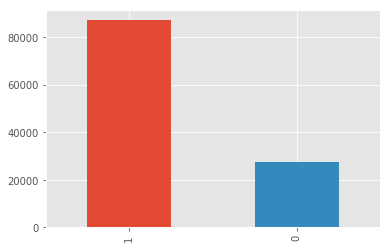

In [8]:
data['target'].value_counts().plot.bar()

######  Распределение целевой переменной - несбалансированное

#### NAN значение: ТОП 30 признаков с наибольшими пустыми данными

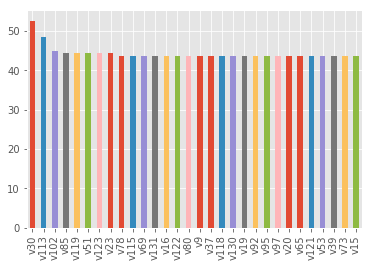

In [9]:
nan_vals = data.isnull().sum()/data.shape[0]*100
nan_vals.sort_values(ascending=False)[:30].plot.bar()

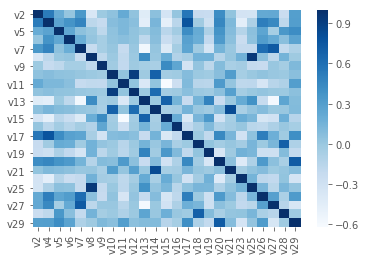

In [10]:
sns.heatmap(data.iloc[:,2:30].corr(), cmap="Blues")

##### 30 первых признаков имеют сильно скоррелированные данные

In [11]:
numeric_types = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(data.select_dtypes(include=numeric_types).columns)
object_vars = list(data.select_dtypes(include=["object"]).columns)

data_num = data[numerical_vars].copy()
data_obj = data[object_vars].copy()

In [12]:
data_obj.nunique()

v3          3
v22     18210
v24         5
v30         7
v31         3
v47        10
v52        12
v56       122
v66         3
v71         9
v74         3
v75         4
v79        18
v91         7
v107        7
v110        3
v112       22
v113       36
v125       90
dtype: int64

##### Слишком много категорий у v22

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score

# useful functions
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=test_size,
    stratify=data['target'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
        
    return X_train_scaled, X_test_scaled

def quality_report(prediction, actual, verbose=False):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "f1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    
    acc = accuracy_score(prediction, actual)
    precision = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1 = f1_score(prediction, actual)
    rocauc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precision, recall, f1, rocauc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    
    return quality_list

### Baseline: Logreg with no NAN only numerical values

In [14]:
data_num_no_nan = data_num.dropna()

In [15]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_no_nan)

Train_shape: (43792, 112) Test shape: (18769, 112)


In [16]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [17]:
model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

In [18]:
quality_list_baseline = quality_report(pred, y_test)

df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.755,0.996,0.756,0.86,0.648


## Feature engineering
- очистить от скоррелированных признаков
- заменить NAN медианой
- обработать категориальные данные
- регуляризация

In [19]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data_num.drop(['target'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [20]:
data_num_corr_features = corr_feature_detect(data_num, threshold=0.9)
print(len(data_num_corr_features))

30


In [21]:
data_num_corr_free = data_num.drop(data_num_corr_features, axis=1)

In [22]:
# Data num with no high correlation and no NAN values anymore
data_num = data_num_corr_free.fillna(data.median())

In [23]:
data_num.isnull().sum().sum()

0

In [24]:
data.shape, data_num.shape

((114321, 132), (114321, 83))

In [25]:
for i in object_vars:
    data[i] = data[i].fillna(data[i].mode()[0])

In [26]:
data_obj.isnull().sum()

v3       3457
v22       500
v24         0
v30     60110
v31      3457
v47         0
v52         3
v56      6882
v66         0
v71         0
v74         0
v75         0
v79         0
v91         3
v107        3
v110        0
v112      382
v113    55304
v125       77
dtype: int64

- не сильно помогла замена, NAN оказался модой 

In [27]:
freqs = data['v22'].value_counts()
top100_v22 = freqs.sort_values(ascending=False)[:100]

In [28]:
def get_most_freq(value):
    if value in top100_v22:
        return value
    return 'other'

In [29]:
data['v22'] = data['v22'].apply(get_most_freq)

In [30]:
data.v22.value_counts()

other    92899
AGDF      2886
YGJ       2119
QKI        668
PWR        649
HZE        423
MNZ        382
PTO        350
ROZ        344
YOD        303
GBS        299
VZF        296
AJQ        252
WNI        244
HDD        243
NRT        238
PFR        226
YEP        224
ADDF       212
VVI        211
QVR        210
WRI        207
ABOF       204
PSE        199
NGS        197
ACWE       190
TVR        182
PTJ        178
ADMP       172
UAG        169
         ...  
EIA        117
ONA        116
YBV        114
OPF        113
GXR        112
KOX        111
MLO        111
AFD        109
DLW        105
IAD        105
EJZ        104
OP         104
WPS        103
BQS        103
RXB        103
SPT        103
SBE        102
ADLK       102
UUC        102
GHP        101
AEXD       101
AFUF       101
ESJ        101
NTM        100
AHBA       100
FVQ        100
SEZ         99
HOF         99
QUN         98
EMP         98
Name: v22, Length: 101, dtype: int64

- не особо помогла обработка v22, надо сократить кол-во 20 категориальных, до самых важных 10-ти признаков

In [31]:
data_obj = data_obj.drop('v22',axis=1)
data_obj.columns

Index(['v3', 'v24', 'v30', 'v31', 'v47', 'v52', 'v56', 'v66', 'v71', 'v74',
       'v75', 'v79', 'v91', 'v107', 'v110', 'v112', 'v113', 'v125'],
      dtype='object')

In [32]:
object_vars

['v3',
 'v22',
 'v24',
 'v30',
 'v31',
 'v47',
 'v52',
 'v56',
 'v66',
 'v71',
 'v74',
 'v75',
 'v79',
 'v91',
 'v107',
 'v110',
 'v112',
 'v113',
 'v125']

In [33]:
%%time
data_obj_dumm = pd.get_dummies(data = data_obj, drop_first = True)
print(data_obj.shape, '->', data_obj_dumm.shape)

(114321, 18) -> (114321, 346)
CPU times: user 344 ms, sys: 33.5 ms, total: 378 ms
Wall time: 407 ms


In [34]:
too_correlated = []
Corr = data_obj_dumm.corr(method='pearson')
for i in Corr:
    for j in Corr.index[Corr[i] > 0.70]:
        if i != j and j not in too_correlated and i not in too_correlated:
            too_correlated.append(j)
            print (i, j, Corr[i][Corr.index == j].values[0])

v47_B v79_R 1.0
v47_C v110_B 0.9999824894215275
v47_D v79_P 0.8344822125494537
v47_D v110_C 0.9919507708278532
v47_E v79_D 0.9999011056253068
v47_F v79_K 0.9983155380154692
v47_G v79_M 1.0
v47_H v56_AX 1.0
v47_I v79_C 0.9120119316076569
v47_J v79_H 0.812291494119097
v71_B v75_B 0.8302687677115218
v71_F v75_D 0.9998253748673491
v91_B v107_B 1.0
v91_C v107_D 1.0
v91_D v107_G 1.0
v91_E v107_F 1.0
v91_G v107_C 1.0
v112_C v125_BH 0.7434363373809986
v112_D v125_CG 0.7110788902721222
v112_G v125_BL 0.8427342741199824
v112_I v125_BM 0.7349254853751075
v112_J v125_E 0.7920059798721237
v112_N v125_AK 0.7531144249754802
v112_P v125_H 0.8234149307080941
v112_S v125_AE 1.0


In [35]:
def corr_feature_pearson(data, threshold=0.7):
    
    corrmat = data_obj_dumm.corr(method='pearson')

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [36]:
data_obj_corr_features = corr_feature_pearson(data_obj_dumm)
print(len(data_obj_corr_features))

19


In [37]:
data_obj_dumm = data_obj_dumm.drop(data_obj_corr_features, axis=1)
data_obj_dumm.shape

(114321, 327)

#### 2) Попробуйте изученные алгоритмы: kNN, Logistic Regression, SVM


In [38]:
data_obj_dumm.shape, data_num.shape

((114321, 327), (114321, 83))

In [39]:
data = pd.concat([data_num, data_obj_dumm], axis=1)

In [40]:
data.head()

,target,v1,v2,v4,v6,v7,v8,v9,v11,v12,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,1,1.335739,8.727474,3.921026,2.599278,3.176895,0.012941,9.999999,16.434108,6.085711,...,0,0,0,0,0,0,0,0,0,0
1,1,1.469550,7.023803,4.205991,2.412790,2.452166,2.301630,9.059582,15.495952,6.507647,...,0,0,0,0,0,0,0,0,0,0
2,1,0.943877,5.310079,4.410969,3.979592,3.928571,0.019645,12.666667,14.756098,6.384670,...,0,0,0,0,0,0,0,0,0,0
3,1,0.797415,8.304757,4.225930,2.097700,1.987549,0.171947,8.965516,16.347483,9.646653,...,0,0,0,0,0,0,0,0,0,0
4,1,1.469550,7.023803,4.205991,2.412790,2.452166,0.386032,9.059582,15.495952,6.320087,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X_train, X_test, y_train, y_test = data_split_train_test(data)

Train_shape: (80024, 409) Test shape: (34297, 409)


In [42]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [43]:
%%time
model_LogR_l1 = LogisticRegression(solver="liblinear", penalty = "l1")
model_LogR_l1.fit(X_train_scaled, y_train)
pred = model_LogR_l1.predict(X_test_scaled)

CPU times: user 3min 49s, sys: 1.32 s, total: 3min 50s
Wall time: 3min 51s


In [44]:
quality_list_logreg_l1 = quality_report(pred, y_test)

df_quality.loc["logreg with l1 after feature eng", :] = quality_list_logreg_l1
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.755,0.996,0.756,0.860,0.648
logreg with l1 after feature eng,0.775,0.963,0.788,0.867,0.693


##### SVM будет долго работать над этим большим датасетом, надо сократить до 10-20признаков

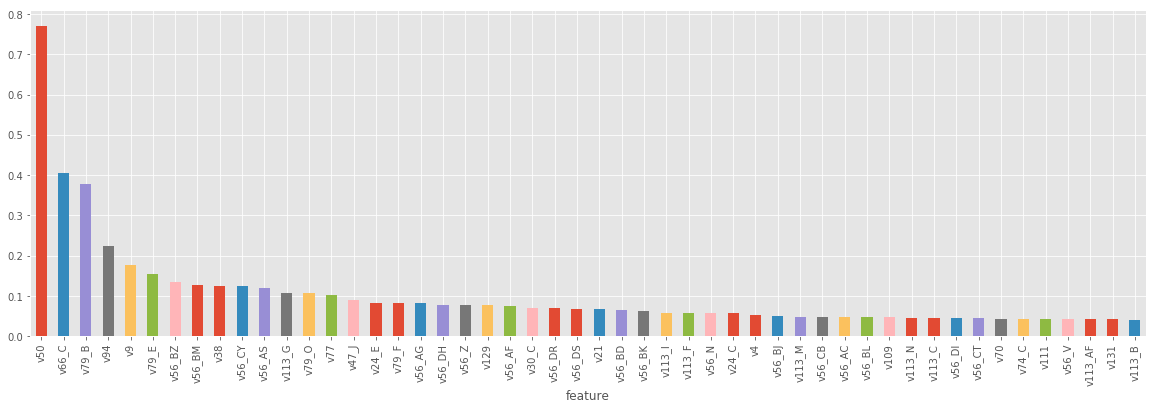

In [45]:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR_l1.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][:50].plot('bar', figsize=(20, 6));

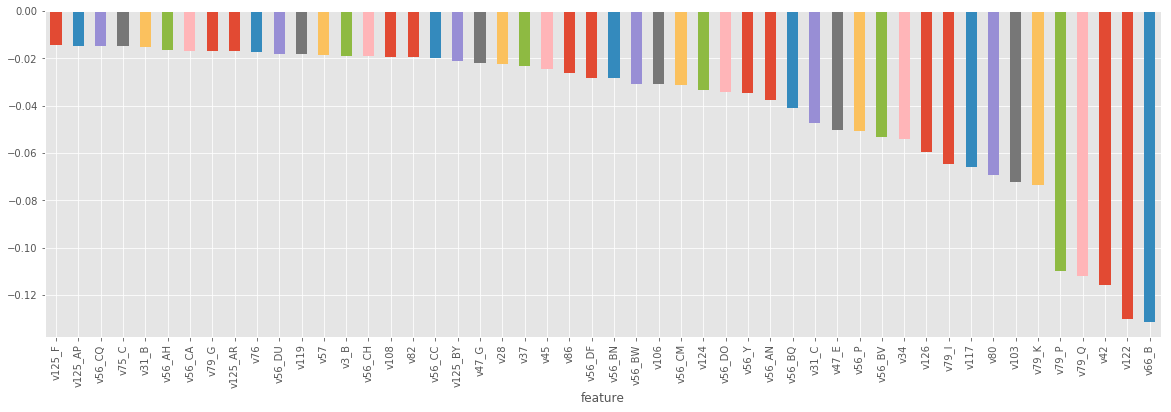

In [46]:
featureImportance = pd.DataFrame({"feature": list(X_train.columns), 
                                  "importance": model_LogR_l1.coef_[0]})

featureImportance.set_index('feature', inplace = True)
featureImportance.sort_values(["importance"], ascending = False, inplace = True)
featureImportance["importance"][-50:].plot('bar', figsize=(20, 6));

In [47]:
# We will need this importance dataframe later for SVM

In [48]:
%%time
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
quality_list = quality_report(pred_knn, y_test.values)

CPU times: user 14min 45s, sys: 1.73 s, total: 14min 47s
Wall time: 15min 9s


In [49]:
df_quality.loc["KNN n=3", :]= quality_list
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.755,0.996,0.756,0.860,0.648
logreg with l1 after feature eng,0.775,0.963,0.788,0.867,0.693
KNN n=3,0.708,0.851,0.784,0.816,0.565


In [50]:
# too big dataset for SVM
data.shape

(114321, 410)

In [51]:
top_20 = featureImportance["importance"][:10] + featureImportance["importance"][-10:]
top_20 = list(top_20.index)
top_20

['v103',
 'v117',
 'v122',
 'v38',
 'v42',
 'v50',
 'v56_BM',
 'v56_BZ',
 'v56_CY',
 'v66_B',
 'v66_C',
 'v79_B',
 'v79_E',
 'v79_I',
 'v79_K',
 'v79_P',
 'v79_Q',
 'v80',
 'v9',
 'v94']

In [56]:
X_train[top_20].shape

(80024, 20)

In [53]:
%%time
model_svc = svm.SVC()
model_svc.fit(X_train[top_20], y_train)
pred_svc = model_svc.predict(X_test[top_20])

CPU times: user 15min 56s, sys: 8.36 s, total: 16min 4s
Wall time: 16min 31s


In [54]:
quality_list = quality_report(pred_svc, y_test.values)

In [55]:
df_quality.loc["SVM top 20 features", :]= quality_list
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.755,0.996,0.756,0.860,0.648
logreg with l1 after feature eng,0.775,0.963,0.788,0.867,0.693
KNN n=3,0.708,0.851,0.784,0.816,0.565
SVM top 20 features,0.761,1.000,0.761,0.864,0.881


SVM - очень крутой 0.88 ROC-AUC, шикарные Precision, Accuracy. Recall, F1 чуток упал.

#### 3) Выполните настройку гиперпараметров для SVM (выбрать те параметры (ядро, регуляризацияб и тд) при которых метрики максимальны)
#### 4*) Настройку гиперпараметров можно проводить используя GridSearchCV в реализации sklearn.


In [5]:
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svc = svm.SVC()
grid_svc = GridSearchCV(svc, param_grid={'C': Cs, 'gamma': gammas, 'kernel': kernels})

In [ ]:
top_10 = featureImportance["importance"][:5] + featureImportance["importance"][-5:]
top_10 = list(top_10.index)

In [ ]:
grid_svc.fit(X_train[top_10], y_train)

In [ ]:
pred_grid = grid_svc.predict(X_test[top_10])

In [ ]:
quality_list = quality_report(pred_grid, y_test.values)
df_quality.loc["SVC with kernel opt top 10", :]= quality_list
df_quality.round(3)

Критерии оценки: - Выполнена предобработка данных, преобразования признаков, посчитаны базовые статистики
- Построено хотя бы два алгоритма и показана разница результатов (или отсутствие разницы)
- Обучен SVM, выполнен подбор гиперпараметров